In [26]:
def missing_dates(df):
    # Convert the date column to datetime type if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Get the first and last date
    first_date = df['Date'].min()
    last_date = df['Date'].max()

    # Generate a sequence of all dates between the first and last date
    all_dates = pd.date_range(start=first_date, end=last_date, freq='D')

    # Find the missing dates
    missing_dates = all_dates[~all_dates.isin(df['Date'])]

    if len(missing_dates) == 0:
        return False
    else:
        return True
    


In [27]:
def Fill_Data(Demand):

    Demand.set_index('Date', inplace=True)
    # Resample the dataframe to fill in any missing dates with NaN values
    Demand = Demand.resample('D').asfreq()

    Demand['Order_Demand'] = Demand['Order_Demand'].interpolate(method='linear')

    return Demand

In [28]:
def metrics(prediction, real_values):
    d = real_values - prediction
    mse_f = np.mean(d**2)
    mae_f = np.mean(abs(d))
    rmse_f = np.sqrt(mse_f)
    r2_f = 1-(sum(d**2)/sum((real_values-np.mean(real_values))**2))

    return mse_f, mae_f, rmse_f, r2_f

In [29]:
# Plot the predicted values
def plot_save(Processed_Demand, predictions, epochs):
    
    name='./Images/LSTM_lags_'+str(epochs)+'.png'
    plt.figure(figsize=(12, 6))
    plt.plot(Processed_Demand.index.values[train_size+7:], Processed_Demand['Order_Demand'].values[train_size+7:], label='Actual')
    plt.plot(Processed_Demand.index.values[train_size+7:], predictions, label='Predicted')
    plt.xlabel('Time')
    plt.ylabel('Demand (Millions)')
    plt.title('LSTM Prediction')
    plt.legend()
    plt.savefig(name)  # Save the figure as 'figure.png'
    plt.show()

In [30]:
def write(Processed_Demand, predictions, epochs):

    Data_LSTM = pd.DataFrame({'Date': Processed_Demand.index.values[train_size+7:], 'Real Demand': Processed_Demand['Order_Demand'].values[train_size+7:], 'Predicted Demand': predictions.flatten()})
    name='./LSTM_lags_'+str(epochs)+'.csv'
    Data_LSTM.to_csv(name, index=False)

Epoch 1/45
92/92 [==============================] - 5s 8ms/step - loss: 0.0530
Epoch 2/45
92/92 [==============================] - 1s 9ms/step - loss: 0.0348
Epoch 3/45
92/92 [==============================] - 1s 8ms/step - loss: 0.0297
Epoch 4/45
92/92 [==============================] - 1s 8ms/step - loss: 0.0246
Epoch 5/45
92/92 [==============================] - 1s 8ms/step - loss: 0.0229
Epoch 6/45
92/92 [==============================] - 1s 9ms/step - loss: 0.0215
Epoch 7/45
92/92 [==============================] - 1s 8ms/step - loss: 0.0212
Epoch 8/45
92/92 [==============================] - 1s 8ms/step - loss: 0.0213
Epoch 9/45
92/92 [==============================] - 1s 8ms/step - loss: 0.0205
Epoch 10/45
92/92 [==============================] - 1s 9ms/step - loss: 0.0207
Epoch 11/45
92/92 [==============================] - 1s 9ms/step - loss: 0.0205
Epoch 12/45
92/92 [==============================] - 1s 8ms/step - loss: 0.0201
Epoch 13/45
92/92 [==============================

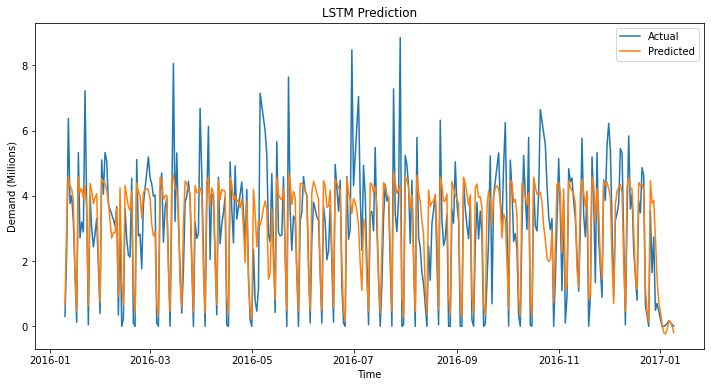

Epoch 1/40
92/92 [==============================] - 1s 9ms/step - loss: 0.0181
Epoch 2/40
92/92 [==============================] - 1s 9ms/step - loss: 0.0178
Epoch 3/40
92/92 [==============================] - 1s 8ms/step - loss: 0.0178
Epoch 4/40
92/92 [==============================] - 1s 8ms/step - loss: 0.0181
Epoch 5/40
92/92 [==============================] - 1s 10ms/step - loss: 0.0179
Epoch 6/40
92/92 [==============================] - 1s 10ms/step - loss: 0.0175
Epoch 7/40
92/92 [==============================] - 1s 11ms/step - loss: 0.0180
Epoch 8/40
92/92 [==============================] - 1s 10ms/step - loss: 0.0177
Epoch 9/40
92/92 [==============================] - 1s 9ms/step - loss: 0.0177
Epoch 10/40
92/92 [==============================] - 1s 10ms/step - loss: 0.0177
Epoch 11/40
92/92 [==============================] - 1s 9ms/step - loss: 0.0177
Epoch 12/40
92/92 [==============================] - 1s 9ms/step - loss: 0.0177
Epoch 13/40
92/92 [=========================

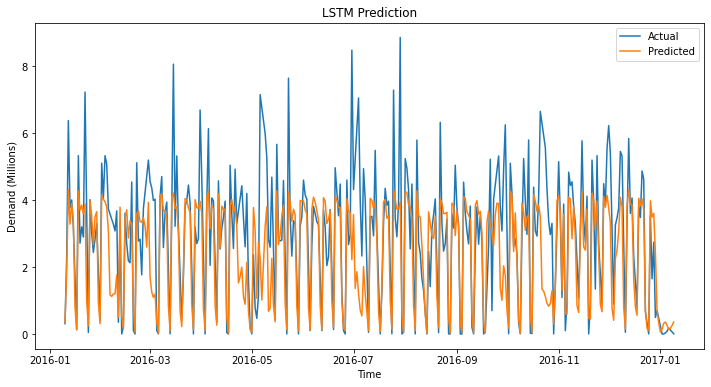

Epoch 1/35
92/92 [==============================] - 1s 8ms/step - loss: 0.0169
Epoch 2/35
92/92 [==============================] - 1s 12ms/step - loss: 0.0171
Epoch 3/35
92/92 [==============================] - 1s 9ms/step - loss: 0.0165
Epoch 4/35
92/92 [==============================] - 1s 9ms/step - loss: 0.0168
Epoch 5/35
92/92 [==============================] - 1s 9ms/step - loss: 0.0166
Epoch 6/35
92/92 [==============================] - 1s 9ms/step - loss: 0.0165
Epoch 7/35
92/92 [==============================] - 1s 9ms/step - loss: 0.0165
Epoch 8/35
92/92 [==============================] - 1s 11ms/step - loss: 0.0172
Epoch 9/35
92/92 [==============================] - 1s 9ms/step - loss: 0.0165
Epoch 10/35
92/92 [==============================] - 1s 9ms/step - loss: 0.0164
Epoch 11/35
92/92 [==============================] - 1s 9ms/step - loss: 0.0165
Epoch 12/35
92/92 [==============================] - 1s 8ms/step - loss: 0.0166
Epoch 13/35
92/92 [============================

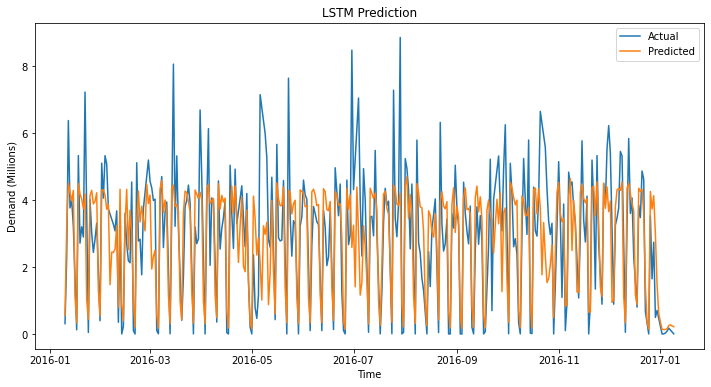

In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load the data
Demand_raw = pd.read_csv("./Demand_Data.csv")
Demand_raw['Date'] = pd.to_datetime(Demand_raw['Date'])
Demand = Demand_raw.groupby('Date')['Order_Demand'].sum().reset_index()

# Preprocess the data
if missing_dates(Demand):
    Processed_Demand = Fill_Data(Demand)
else:
    Processed_Demand = Demand

Processed_Demand['Order_Demand'] = Processed_Demand['Order_Demand'] / 1000000

# Create lagged features
lags = 7  # Number of lagged features
lagged_data = Processed_Demand.copy()
for i in range(1, lags + 1):
    lagged_data[f'Lag_{i}'] = lagged_data['Order_Demand'].shift(i)

# Drop missing values caused by the lag
lagged_data.dropna(inplace=True)

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(lagged_data)#.drop(columns=lagged_data.columns[0]))

# Split the data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Prepare the train data

train_X, train_y = train_data[:, :-1], train_data[:, -1]
train_X = train_X.reshape(train_X.shape[0], lags, 1)

# Create the LSTM model
model = keras.Sequential()
model.add(layers.LSTM(64, activation='relu', input_shape=(lags, 1), return_sequences=True))
model.add(layers.LSTM(32, activation='relu', return_sequences=True))
model.add(layers.LSTM(16, activation='relu', return_sequences=True))
model.add(layers.LSTM(8, activation='relu'))
model.add(layers.Dense(1))  # Output layer

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

batch_size = 16  # Batch size

for epochs in [30, 100, 500, 1000]:

    model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, verbose=1)

    # Prepare the test data
    test_X, test_y = test_data[:, :-1], test_data[:, -1]
    test_X = test_X.reshape(test_X.shape[0], lags, 1)

    # Predict on the test data
    predictions = model.predict(test_X)

    # Reshape predictions to match the original shape
    predictions = predictions.reshape(predictions.shape[0], -1)

    # Create a temporary array with the original shape
    temp_array = np.zeros((predictions.shape[0], lagged_data.shape[1]))
    temp_array[:, -1] = predictions[:, 0]

    # Inverse scale the predictions
    predictions = scaler.inverse_transform(temp_array)

    # Retrieve the target variable from the scaled predictions
    predictions = predictions[:, -1]



    # Evaluate the model
    mse = model.evaluate(test_X, test_y, batch_size=batch_size, verbose=0)
    print("Mean Squared Error:", mse)

    write(Processed_Demand, predictions, epochs)
    plot_save(Processed_Demand, predictions, epochs)
